In [43]:
import time
#import pydoocs
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
#import cv2
import seaborn as sns
import struct
import pprint

In [46]:
import tables
tables.file._open_files.close_all()

In [47]:
f.close()
#
f=h5py.File('PBD2_VRFD_pbd2_stream_6_run52040_file117_20240227T153436.hdf5', 'r+')
f.keys()

<KeysViewHDF5 ['FLASH.DIAG', 'FLASH.SDIAG']>

In [48]:
print(f['FLASH.DIAG'].keys())
print(f['FLASH.DIAG/BPM'].keys())
print(f['FLASH.DIAG/BPM/9FL2XTDS'].keys())

<KeysViewHDF5 ['BPM', 'CAMERA', 'TOROID']>
<KeysViewHDF5 ['9FL2XTDS']>
<KeysViewHDF5 ['BUNCH_VALID.TD', 'CHARGE.TD', 'TimeStamp', 'TrainId', 'X.TD', 'Y.TD']>


In [49]:
LL=np.nonzero(f['FLASH.DIAG/BPM/9FL2XTDS/X.TD'][2,:])
print(LL)
print(LL[0][0])
Id=LL[0][0]

(array([480, 481, 482]),)
480


In [50]:
CHARGE_TD=f['FLASH.DIAG/BPM/9FL2XTDS/CHARGE.TD'][:,Id]
TrainId_TD=f['FLASH.DIAG/BPM/9FL2XTDS/TrainId'][:]
x_TD=f['FLASH.DIAG/BPM/9FL2XTDS/X.TD'][:,Id]
y_TD=f['FLASH.DIAG/BPM/9FL2XTDS/Y.TD'][:,Id]

In [51]:
del f['FLASH.DIAG/BPM/9FL2XTDS/CHARGE.TD']
dset = f.create_dataset('FLASH.DIAG/BPM/9FL2XTDS/CHARGE.TD', data=CHARGE_TD)

del f['FLASH.DIAG/BPM/9FL2XTDS/X.TD']
dset = f.create_dataset('FLASH.DIAG/BPM/9FL2XTDS/X.TD', data=x_TD)

del f['FLASH.DIAG/BPM/9FL2XTDS/Y.TD']
dset = f.create_dataset('FLASH.DIAG/BPM/9FL2XTDS/Y.TD', data=y_TD)
# we complet the BPM grpu here 


In [52]:
del f['FLASH.DIAG/BPM/9FL2XTDS/BUNCH_VALID.TD']
del f['FLASH.DIAG/BPM/9FL2XTDS/TimeStamp']

In [53]:
print(f['FLASH.DIAG/BPM/9FL2XTDS'].keys())

<KeysViewHDF5 ['CHARGE.TD', 'TrainId', 'X.TD', 'Y.TD']>


In [54]:
print(f['FLASH.DIAG/TOROID'].keys())
print(f['FLASH.DIAG/TOROID/7FL2XTDS'].keys())
#print(f['FLASH.DIAG/TOROID/7FL2XTDS/TimeStamp'].shape)
TrainId_7FL2XTDS=f['FLASH.DIAG/TOROID/7FL2XTDS/TrainId'][:]
charge_7FL2XTDS=f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'][:,480]
print(f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'][3:10,480])
print(CHARGE_TD[3:10])
print(TrainId_7FL2XTDS[3:10])
print(TrainId_TD[3:10])

<KeysViewHDF5 ['7FL2XTDS']>
<KeysViewHDF5 ['CHARGE.TD', 'TimeStamp', 'TrainId']>
[0.1989  0.1985  0.19755 0.1989  0.19885 0.19875 0.1984 ]
[0.30899    0.30866662 0.3078677  0.30885684 0.2996126  0.30914214
 0.30944017]
[1942832580 1942832581 1942832582 1942832583 1942832584 1942832585
 1942832586]
[1942832580 1942832581 1942832582 1942832583 1942832584 1942832585
 1942832586]


In [55]:
del f['FLASH.DIAG/TOROID/7FL2XTDS/TimeStamp']

In [56]:
charge_7FL2XTDS=f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'][:,480]
del f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD']
dset = f.create_dataset('FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD', data=charge_7FL2XTDS)

In [57]:
#plt.plot(f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'][2,:])
#print(f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'][2,480])

In [58]:
print(f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'].shape)
print(f['FLASH.DIAG/TOROID/7FL2XTDS'].keys())

(708,)
<KeysViewHDF5 ['CHARGE.TD', 'TrainId']>


In [59]:
print(f['FLASH.DIAG/CAMERA'].keys())
print(f['FLASH.DIAG/CAMERA/OTR9FL2XTDS'].keys())
print(f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/Value'])  # it is 707 shots !
print(f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TrainId'].shape)
TrainId_image=f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TrainId'][:]
image=f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/Value'][:,:,:]

<KeysViewHDF5 ['OTR9FL2XTDS']>
<KeysViewHDF5 ['TimeStamp', 'TrainId', 'Value']>
<HDF5 dataset "Value": shape (708, 640, 2360), type "|u1">
(708,)


In [60]:
del f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TimeStamp']

In [61]:
#print(f['FLASH.DIAG/BPM/9FL2XTDS/TimeStamp'][1,1])
#print(f['FLASH.DIAG/BPM/9FL2XTDS/TimeStamp'][1,0])
#print(f['FLASH.DIAG/BPM/9FL2XTDS/TrainId'][0:3])
#

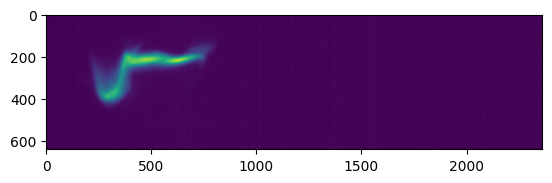

In [62]:
plt.imshow(image[3,:,:]) # we should reduce the size of the image

In [38]:

#from mat4py import loadmat
#from scipy.io import loadmat
#databgr = loadmat('bgr.mat')
#plt.imshow(databgr['bgr_img'])

In [37]:
#imageC=image[3,:,:]-hlc_clean_image(databgr['bgr_img'][:,:])
#x_projection2=np.mean(hlc_clean_image(imageC),0)
#plt.imshow(hlc_clean_image(imageC[:,:]))

In [36]:
import numpy as np
from scipy.ndimage import convolve

def hlc_clean_image(input_img):
    input_img = hlc_denoise_image(input_img)

    gaussian_filter = calc_gaussian_2d(30, 7)
    img_filtered = convolve(input_img, gaussian_filter, mode='constant')

    good_soglia = ricerca_soglia_lg(img_filtered, 0.1, 0.00000001, 30)

    _, maschera = mask_image(img_filtered, good_soglia)
    fondo_punto = np.min(input_img)
    input_img = input_img - fondo_punto

    clean_img = input_img * maschera
    return clean_img

def calc_gaussian_2d(pixels, sigma):
    gauss1d = hlc_calc_gaussian(np.arange(pixels), [0, 1, (pixels-1)/2, sigma])
    matrix = np.outer(gauss1d, gauss1d)
    return matrix

def ricerca_soglia_lg(img_input, guess, tol, n_iter):
    area_s = img_input.size
    signal_s = np.sum(img_input)

    for _ in range(n_iter):
        img_k, mask_k = mask_image(img_input, guess)

        area_k = np.sum(mask_k)
        signal_k = np.sum(img_k)

        noise_k = (signal_s - signal_k) / (area_s - area_k + 1)
        signal_d = signal_k / (area_k + 1)
        s_n_ratio = np.abs(signal_d - noise_k) / (noise_k + 1)
        new_guess = (1 + 1/s_n_ratio) / s_n_ratio / np.sqrt(2)

        if np.abs(new_guess - guess) < tol * guess:
            threshold = min([new_guess, 0.3])
            return threshold
        else:
            guess = new_guess

    return guess

def mask_image(img_in, fraction_of_maximum):
    max_intensity = np.max(img_in)
    mask = (img_in >= max_intensity * fraction_of_maximum)
    masked_image = img_in * mask
    return masked_image, mask

def hlc_denoise_image(img, threshold_factor=3):
    filter_matrix = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]]) / 8
    img_avg = convolve(img.astype(float), filter_matrix, mode='constant')

    mask = (img > threshold_factor * img_avg)

    img_denoised = img.copy()
    img_denoised[mask] = img_avg[mask]

    return img_denoised
def hlc_fit_gaussian(x, y):
    fit_data = []
    if not x or not y:
        return fit_data

    x = np.array(x).flatten()
    y = np.array(y).flatten()

    fit_data_pos, sumsq_error_pos = fit_positive_gaussian(x, y)
    fit_data_neg, sumsq_error_neg = fit_positive_gaussian(x, -y)

    if sumsq_error_neg < sumsq_error_pos:
        fit_data = fit_data_neg * np.array([-1, -1, 1, 1])
    else:
        fit_data = fit_data_pos

    fit_data = fmin(err_gaussian, fit_data, disp=False, maxiter=1500, maxfun=1500, args=(x, y))
    return fit_data

def fit_positive_gaussian(x, y):
    baseline = np.min(y)
    height = np.max(y) - baseline
    pb = y - baseline
    pbx = pb * x
    pbxsq = pbx * x
    sum_pb = np.sum(pb)
    if sum_pb == 0:
        sum_pb = 1e-3
    mu = np.sum(pbx) / sum_pb
    sigma = np.sqrt(np.sum(pbxsq) / sum_pb - mu**2)

    initial_params = [baseline, height, mu, sigma]
    fit_data, sumsq_error = fmin(err_gaussian, initial_params, disp=False, maxiter=1500, maxfun=1500, args=(x, y))
    return fit_data, sumsq_error

def err_gaussian(parameters, *data):
    x, y = data
    err = (y - hlc_calc_gaussian(x, parameters))**2
    return np.sum(err)

def hlc_calc_gaussian(x, parameters):
    offset, amplitude, mu, sigma = parameters
    return offset + amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

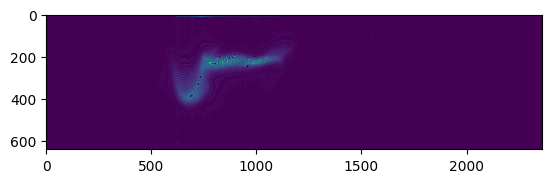

In [37]:
clean_image=hlc_clean_image(image[4,:,:])
p1=plt.imshow(clean_image)
x_projection=np.mean(clean_image,0)
#x_projection2=np.mean(image[3,:,:],0)
p2=plt.plot(x_projection)
plt.show(p1, p2)

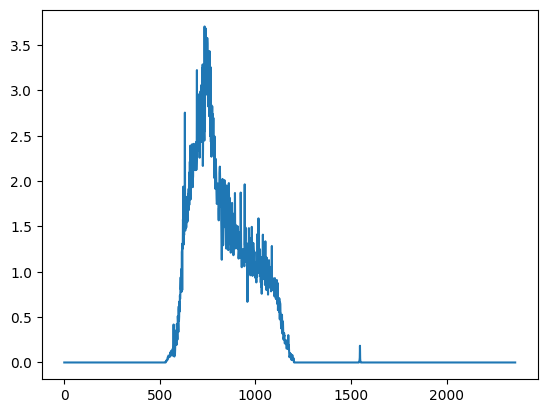

In [38]:
p2=plt.plot(x_projection)

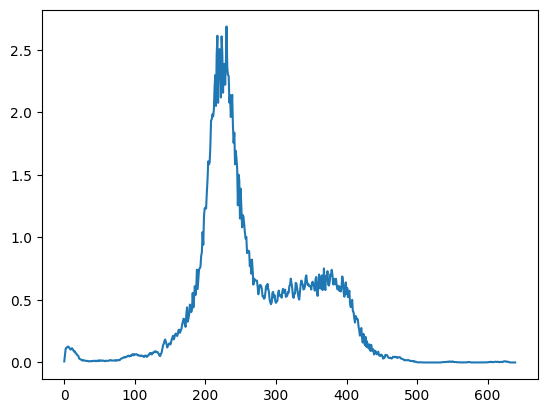

In [39]:
x_pos_good = np.where(x_projection[:] > 0)[0]
x_pos_good = np.arange(min(x_pos_good), max(x_pos_good) + 1)
y_projection=np.mean(clean_image,1)
y_pos_good = np.where(y_projection[:] > 0)[0]
y_pos_good = np.arange(min(y_pos_good), max(y_pos_good) + 1)
plt.plot(y_projection)

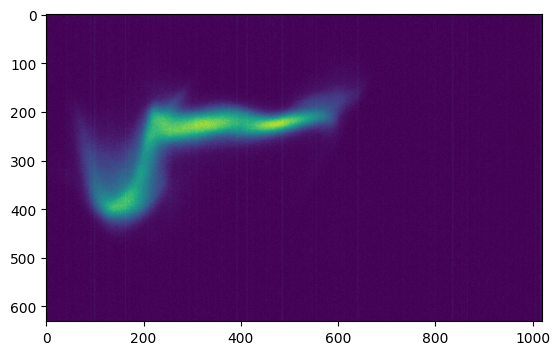

In [40]:
plt.imshow(image[4,min(y_pos_good):max(y_pos_good),min(x_pos_good):max(x_pos_good)])

In [41]:
# for 707 image do the same 
image_data_list = []
for i in range(len(TrainId_image)):
    clean_image=hlc_clean_image(image[i,:,:])
    x_projection=np.mean(clean_image,0)
    x_pos_good = np.where(x_projection[:] > 0)[0]
    x_pos_good = np.arange(min(x_pos_good), max(x_pos_good) + 1)
    y_projection=np.mean(clean_image,1)
    y_pos_good = np.where(y_projection[:] > 0)[0]
    y_pos_good = np.arange(min(y_pos_good), max(y_pos_good) + 1)

    cam_img=image[i,min(y_pos_good):max(y_pos_good),min(x_pos_good):max(x_pos_good)]
    image_data_list.append({'TrainId_image': TrainId_image[i], 'data': cam_img})

image_data_array = np.array(image_data_list)

del f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/Value']


TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [47]:
image_data_array

array([{'TrainId_image': 1942829739, 'data': array([[1, 1, 1, ..., 1, 0, 0],
              [1, 1, 1, ..., 0, 1, 1],
              [1, 0, 1, ..., 1, 1, 1],
              ...,
              [1, 0, 0, ..., 1, 1, 1],
              [1, 1, 1, ..., 0, 0, 1],
              [1, 0, 0, ..., 1, 0, 1]], dtype=uint8)}                       ,
       {'TrainId_image': 1942829740, 'data': array([[0, 1, 0, ..., 5, 0, 0],
              [1, 1, 1, ..., 4, 1, 1],
              [1, 1, 0, ..., 4, 1, 0],
              ...,
              [0, 1, 0, ..., 5, 0, 0],
              [0, 1, 0, ..., 3, 0, 0],
              [0, 1, 1, ..., 2, 0, 0]], dtype=uint8)}                       ,
       {'TrainId_image': 1942829741, 'data': array([[1, 1, 0, ..., 1, 0, 1],
              [1, 1, 1, ..., 0, 0, 1],
              [0, 0, 2, ..., 1, 1, 2],
              ...,
              [0, 0, 1, ..., 1, 0, 1],
              [0, 1, 1, ..., 0, 0, 1],
              [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)}                       ,
       {'T

In [70]:
image_data_array

array([{'TrainId_image': 1942829739, 'data': array([[1, 1, 1, ..., 1, 0, 0],
              [1, 1, 1, ..., 0, 1, 1],
              [1, 0, 1, ..., 1, 1, 1],
              ...,
              [1, 0, 0, ..., 1, 1, 1],
              [1, 1, 1, ..., 0, 0, 1],
              [1, 0, 0, ..., 1, 0, 1]], dtype=uint8)}                       ,
       {'TrainId_image': 1942829740, 'data': array([[0, 1, 0, ..., 5, 0, 0],
              [1, 1, 1, ..., 4, 1, 1],
              [1, 1, 0, ..., 4, 1, 0],
              ...,
              [0, 1, 0, ..., 5, 0, 0],
              [0, 1, 0, ..., 3, 0, 0],
              [0, 1, 1, ..., 2, 0, 0]], dtype=uint8)}                       ,
       {'TrainId_image': 1942829741, 'data': array([[1, 1, 0, ..., 1, 0, 1],
              [1, 1, 1, ..., 0, 0, 1],
              [0, 0, 2, ..., 1, 1, 2],
              ...,
              [0, 0, 1, ..., 1, 0, 1],
              [0, 1, 1, ..., 0, 0, 1],
              [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)}                       ,
       {'T

In [71]:
#['FLASH.DIAG', 'FLASH.FEL', 'FLASH.MAGNETS', 'FLASH.RF', 'FLASH.SDIAG']>
#f['FLASH.FEL'].keys()
#f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/Value']
#del f['FLASH.DIAG/CAMERA']
#f['FLASH.DIAG'].keys()
f['FLASH.DIAG'].keys()

<KeysViewHDF5 ['BPM', 'TOROID']>

In [67]:
del f['FLASH.DIAG/FLASH.DIAG']

In [72]:
dset = f.create_dataset('FLASH.DIAG/image', data=image_data_array)

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [63]:
f.close()

In [76]:
np.save('image_PBD2_VRFD_pbd2_stream_6_run52040_file113_20240227T152952.npy', image_data_array)